# Analítica de datos - ejemplo de clase lfw_people - comparación distintos métodos de clasificación

## Lectura base de datos y partición conjunto de entrenamiento y conjunto de evaluación

Nota: conjunto de evaluación no se utiliza en NINGUNA etapa de entrenamiento 

Dimensiones base de datos: 
 (1288, 50, 37)
Clases base de datos: 
 ['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Tony Blair']


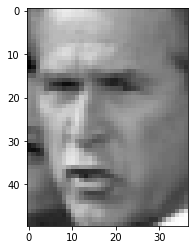

In [1]:
#Paso 1: Lectura
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from funciones_people import pre_exploratorio, save_fig, plot_confusion_matrix
from sklearn.impute import SimpleImputer 
from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score, cross_val_predict
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.pipeline import Pipeline
#base de datos
from sklearn.datasets import fetch_lfw_people
#https://scikit-learn.org/stable/auto_examples/applications/plot_face_recognition.html

%matplotlib inline
#descargar base de datos
lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4)

#ejemplo imagen en base de datos
print('Dimensiones base de datos: \n',lfw_people.images.shape)
plt.imshow(lfw_people.images[30,:,:],cmap='gray')

print('Clases base de datos: \n',lfw_people['target_names'])

Dimensiones tipo pandas:  (1288, 1850)


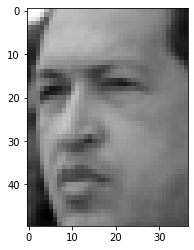

In [2]:
# datos tipo pandas
Xdata = pd.DataFrame(lfw_people.data)
y = lfw_people.target
print('Dimensiones tipo pandas: ',Xdata.shape)
plt.imshow(np.array(Xdata.iloc[0,:]).reshape(lfw_people.images.shape[1],lfw_people.images.shape[2]),cmap='gray')


In [3]:
#Paso 2: Particion entrenamiento y validacion
# Tamaño Xtrain 70%, Tamaño Xtest 30%
Xtrain, Xtest, ytrain,ytest = train_test_split(Xdata,y,test_size=0.3) #fijar en 0.3 para entrenar -- 0.95 para demostrar funcionalidad del código
Xtrain.head()

0           1           2           3           4           5     \
1003  153.333328  168.000000  203.000000  222.333328  235.666672  244.666672   
183    60.666668   68.333336   82.000000   94.000000  144.000000  177.000000   
1280  141.666672  138.666672  120.333336  105.000000   93.000000   89.000000   
746    21.333334   24.000000   53.000000   85.666664   84.000000  112.333336   
1181   68.333336   61.333332   86.666664  117.000000  132.000000  136.000000   

            6           7           8           9        ...            1840  \
1003  247.666672  252.666672  254.000000  253.666672     ...      226.333328   
183   180.666672  184.666672  186.000000  187.000000     ...       92.666664   
1280  140.000000  190.333328  206.333328  212.333328     ...       78.666664   
746   175.000000  207.666672  226.000000  239.333328     ...       70.000000   
1181  141.333328  145.333328  150.333328  158.000000     ...       79.333336   

            1841        1842        1843        1844        1845        1846  \
1003  224.666672  219.666672  210.666672  202.666672  201.333328  206.333328   
183   101.666664  106.666664  110.000000  110.333336  101.666664  100.666664   
1280   77.000000   74.666664   74.333336   75.000000   72.333336   73.666664   
746    77.333336   68.000000   49.333332   39.666668   38.666668   47.333332   
1181   45.000000   36.666668   36.000000   36.333332   34.000000   33.333332   

            1847        1848        1849  
1003  207.666672  178.000000  114.000000  
183   126.666664  175.000000  223.666672  
1280   79.333336   84.333336   87.333336  
746    70.333336   76.000000   83.000000  
1181   34.333332   35.666668   35.000000  

[5 rows x 1850 columns]

[t-SNE] Computing 70 nearest neighbors...
[t-SNE] Indexed 901 samples in 0.051s...
[t-SNE] Computed neighbors for 901 samples in 2.716s...
[t-SNE] Computed conditional probabilities for sample 901 / 901
[t-SNE] Mean sigma: 13.427479
[t-SNE] Computed conditional probabilities in 0.036s
[t-SNE] Iteration 50: error = 75.1057816, gradient norm = 0.3606859 (50 iterations in 0.397s)
[t-SNE] Iteration 100: error = 74.4532394, gradient norm = 0.3678931 (50 iterations in 0.386s)
[t-SNE] Iteration 150: error = 75.2975693, gradient norm = 0.3648419 (50 iterations in 0.341s)
[t-SNE] Iteration 200: error = 75.7679062, gradient norm = 0.3449895 (50 iterations in 0.349s)
[t-SNE] Iteration 250: error = 75.3959427, gradient norm = 0.3455826 (50 iterations in 0.390s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 75.395943
[t-SNE] KL divergence after 251 iterations: 1797693134862315708145274237317043567980705675258449965989174768031572607800285387605895586327668781715404589535143824

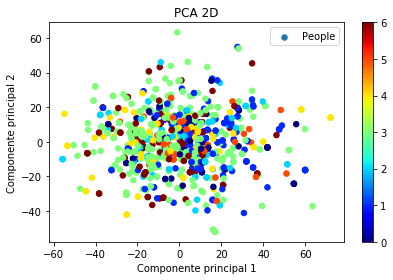

Guardando... relevancia_PCA_eigenface


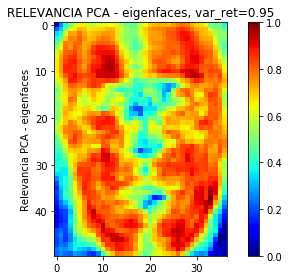

Guardando... tsne_2D


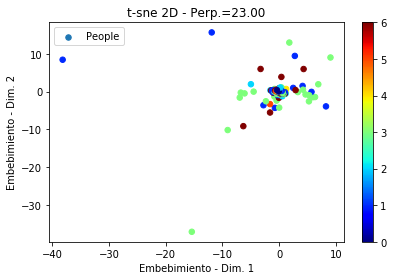

True

In [4]:
#%% Paso 3 : Analisis exploratorio
#preproceso entrada  y salida para analisis exploratorio
img_path = 'im2/'
pre_exploratorio(Xtrain,ytrain,img_path,'People',lfw_people.images.shape[1],lfw_people.images.shape[2])

In [5]:
#%% Paso 4 : Escoger modelo por gridsearchCV utilizando pipeline
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.externals import joblib #https://joblib.readthedocs.io/en/latest/

steps=[[('rep',  PCA()),
        ('cla', LogisticRegression())],
       [('rep',  PCA()),
        ('cla', SGDClassifier())]
       [('rep',  PCA()),
        ('cla', SVC())],
      ]
parameters = [{
              'rep__n_components' : [0.8,0.9],              
              'cla__C': [0.5,1],
              },
              {
              'rep__n_components' : [0.8,0.9],              
              'cla__alpha': [0.0001,0.001],
              }
              {
             'rep__n_components' : [0.8,0.9],              
             'cla__C': [0.1,1,100,500,1e3],
             'cla__gamma': [0.01, 0.1, 1,10, 100,1e3],     
             }
             ]

label_models = ['PCA_Logistic','PCA_SGD', 'PCA_SVCrbf']

best_model = []
filename = 'resultados/people_comp'
for i in range(len(steps)):
    print('modelo %d/%d' % (i+1,len(steps)))
    grid_search = GridSearchCV(Pipeline(steps[i]), parameters[i], n_jobs=4,cv=5,
                                scoring='balanced_accuracy',verbose=10)
    grid_search.fit(Xtrain, ytrain)
    print(grid_search.cv_results_)
    #mejor modelo entrenado
    best_model += [grid_search.best_estimator_]
    joblib.dump(best_model,filename+".pkl")

print('Mejores modelos:\n')
best_model

SyntaxError: invalid syntax (<ipython-input-5-f8318c530599>, line 23)

# Calcular rendimiento en cojunto de test

In [ ]:
#%% Paso 5: evaluar sobre Xtest
my_model_loaded = joblib.load(filename+".pkl")
path_img = 'im2/'
for i in range(len(my_model_loaded)):
    print('Evaluando modelo %d/%d' % (i+1,len(my_model_loaded)))

    ytest_e = my_model_loaded[i].predict(Xtest)
    acc = accuracy_score(ytest,ytest_e)
    cm = confusion_matrix(ytest, ytest_e, labels=range(lfw_people.target_names.shape[0]))
    cm = 100*cm/cm.sum(axis=1)
    
    plt.imshow(cm,vmin=0,vmax=100)
    plt.title('ACC = %.2f %%' % (100*acc))
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.colorbar()
    save_fig(path_img,label_models[i])                      
    plt.show()
    
    cr = classification_report(ytest, ytest_e, target_names=lfw_people.target_names)                          
    #support = #muestras en la clase estudiada
    print(cr)


In [ ]:
my_model_loaded[2].get_params